# Model analysis

This notebook can be used to compare the performance of different top-down models when assessing which one(s) to use for inference.

Enter values for each variable in the first cell below according to your setup and requirements. Each variable and corresponding value should look like the following,

`variable_name = value`

After entering values for all variables, click Cell > Run All in the top menu bar to execute the notebook and show the label analysis outputs.

Note that the 'r' before the opening quotation mark for the `model_folder` variable is required to ensure that backslashes in the folder path don't cause issues during processing, as the backslash is usually used to denote an "escaped" character in character strings.

## Parameters

In [1]:
# This folder should contain a set of folders with the output of training a model in SLEAP
# e.g. r"D:\Documents\Ant-posture\models"
model_folder = r""

## Code execution

In [2]:
# Import all necessary Python modules required to run the notebook
import numpy as np
import pandas as pd
import os
import sleap

import matplotlib.pyplot as plt
import seaborn as sns

# Configure Pandas to display dataframes up to 200 rows in full
pd.set_option('display.max_rows', 200)

### Summary stats

In [3]:
# Indicate the summary fields (as opposed to fields that are relevant for individual body parts etc.)
summary_stats = ['vis.tp',
                 'vis.fp',
                 'vis.tn',
                 'vis.fn',
                 'vis.precision',
                 'vis.recall',
                 'dist.avg',
                 'dist.p50',
                 'dist.p75',
                 'dist.p90',
                 'dist.p95',
                 'dist.p99',
                 'oks_voc.mAP',
                 'oks_voc.mAR',
                 'pck_voc.mAP',
                 'pck_voc.mAR']

# Define the renaming scheme for the training phase
metric_type_dict = {
    'metrics.train.npz': 'Training',
    'metrics.val.npz': 'Validation',
    'metrics.test.npz': 'Test'
}

# Extract the metrics for each model in the model folder
all_stats = []

for entry in os.scandir(model_folder):
    if entry.is_dir():
        for file in os.scandir(entry):
            if file.is_file() and file.name.endswith(".npz"):
                with np.load(file.path, None, True) as np_file:
                    stats = {'model': entry.name, 'metric_type': file.name}
                    stats.update({key: np_file['metrics'][()][key][()] for key in np_file['metrics'][()] if key in summary_stats})
                    all_stats.append(stats)

# Rename the metric type field values and display the result
df_all_stats = pd.DataFrame(all_stats).replace({'metric_type': metric_type_dict})
display(df_all_stats)

,model,metric_type,vis.tp,vis.fp,vis.tn,vis.fn,vis.precision,vis.recall,dist.avg,dist.p50,dist.p75,dist.p90,dist.p95,dist.p99,oks_voc.mAP,oks_voc.mAR,pck_voc.mAP,pck_voc.mAR
0,240514_102521.centroid.fold_1,Test,324,0,0,0,1.000000,1.000000,0.000019,0.000020,0.000028,0.000033,0.000035,0.000039,0.900990,0.900000,0.900990,0.900000
1,240514_102521.centroid.fold_1,Training,862,2,0,0,0.997685,1.000000,3.269901,0.000021,0.000029,0.000033,0.000036,180.202884,0.849629,0.854545,0.849629,0.854545
2,240514_102521.centroid.fold_1,Validation,306,0,0,0,1.000000,1.000000,0.000017,0.000018,0.000027,0.000032,0.000033,0.000037,0.851485,0.850000,0.851485,0.850000
3,240514_102521.centroid.fold_2,Test,324,0,0,0,1.000000,1.000000,0.000019,0.000020,0.000028,0.000033,0.000035,0.000039,0.900990,0.900000,0.900990,0.900000
4,240514_102521.centroid.fold_2,Training,846,0,0,0,1.000000,1.000000,0.000019,0.000021,0.000028,0.000032,0.000035,0.000040,0.871287,0.870370,0.871287,0.870370
5,240514_102521.centroid.fold_2,Validation,322,2,0,0,0.993827,1.000000,8.753553,0.000020,0.000029,0.000034,0.000042,186.841826,0.801980,0.809524,0.801980,0.809524
6,240514_102521.centroid.fold_3,Test,324,0,0,0,1.000000,1.000000,0.000019,0.000020,0.000028,0.000033,0.000035,0.000039,0.900990,0.900000,0.900990,0.900000
7,240514_102521.centroid.fold_3,Training,898,2,0,0,0.997778,1.000000,3.138813,0.000020,0.000028,0.000033,0.000035,179.628946,0.841584,0.844828,0.841584,0.844828
8,240514_102521.centroid.fold_3,Validation,270,0,0,0,1.000000,1.000000,0.000020,0.000022,0.000028,0.000034,0.000036,0.000039,0.881188,0.882353,0.881188,0.882353
9,240514_102521.centroid.fold_4,Test,324,0,0,0,1.000000,1.000000,0.000019,0.000020,0.000028,0.000033,0.000035,0.000039,0.900990,0.900000,0.900990,0.900000


## Model comparison

### All models

NOTE: Different model types are not directly comparable to each other (i.e. accuracy measures for centroid models cannot be directly compared to centred instance models).

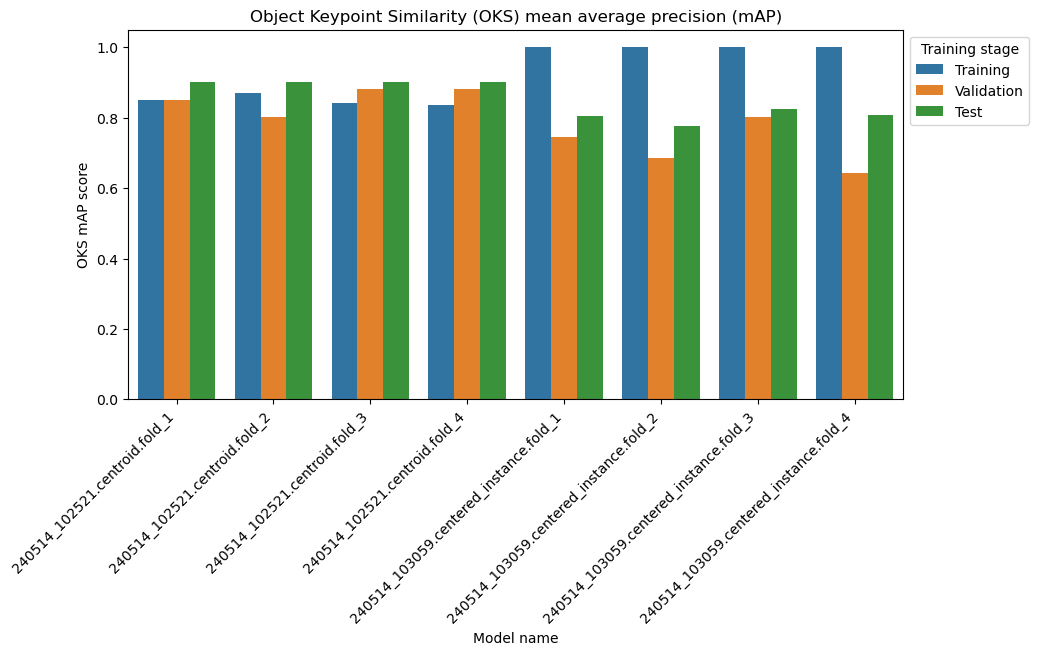

In [4]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
sns.barplot(df_all_stats, x='model', y='oks_voc.mAP', hue='metric_type', ax=ax, hue_order=['Training', 'Validation', 'Test'])

# Set the legend name and reposition
ax.legend(title='Training stage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Format the axes and set the axis names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Model name")
ax.set_ylabel("OKS mAP score")

# Add the plot title and display the plot
ax.set_title("Object Keypoint Similarity (OKS) mean average precision (mAP)")
plt.show()

### Centroid model comparison

NOTE: This assumes that the centroid models contain "centroid" in their name.

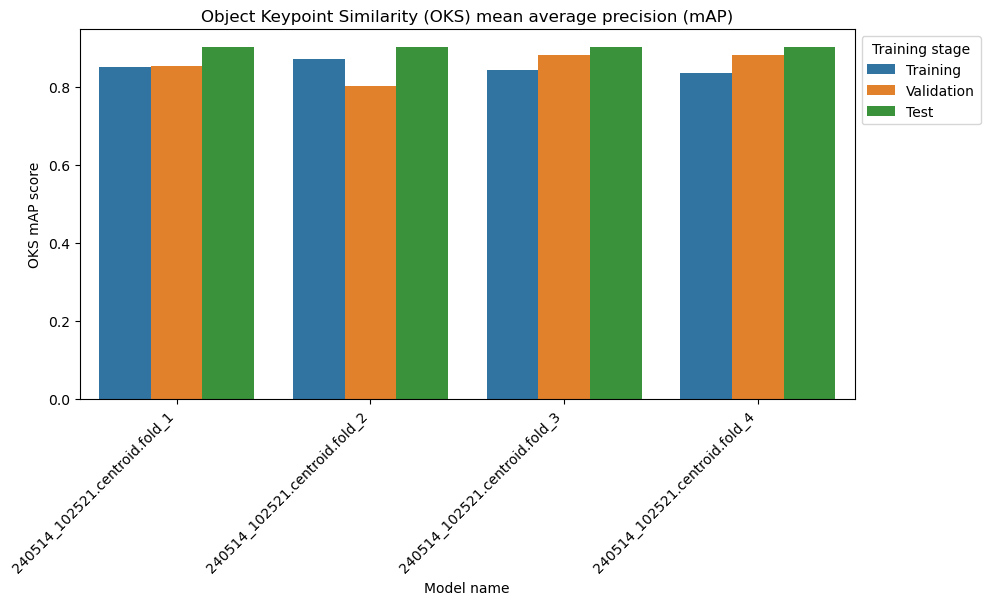

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
sns.barplot(df_all_stats.loc[df_all_stats['model'].str.contains('centroid')], x='model', y='oks_voc.mAP', hue='metric_type', ax=ax, hue_order=['Training', 'Validation', 'Test'])

# Set the legend name and reposition
ax.legend(title='Training stage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Format the axes and set the axis names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Model name")
ax.set_ylabel("OKS mAP score")

# Add the plot title and display the plot
ax.set_title("Object Keypoint Similarity (OKS) mean average precision (mAP)")
plt.show()

### Centred instance model comparison

NOTE: This assumes that the centroid models contain "centered_instance" in their name.

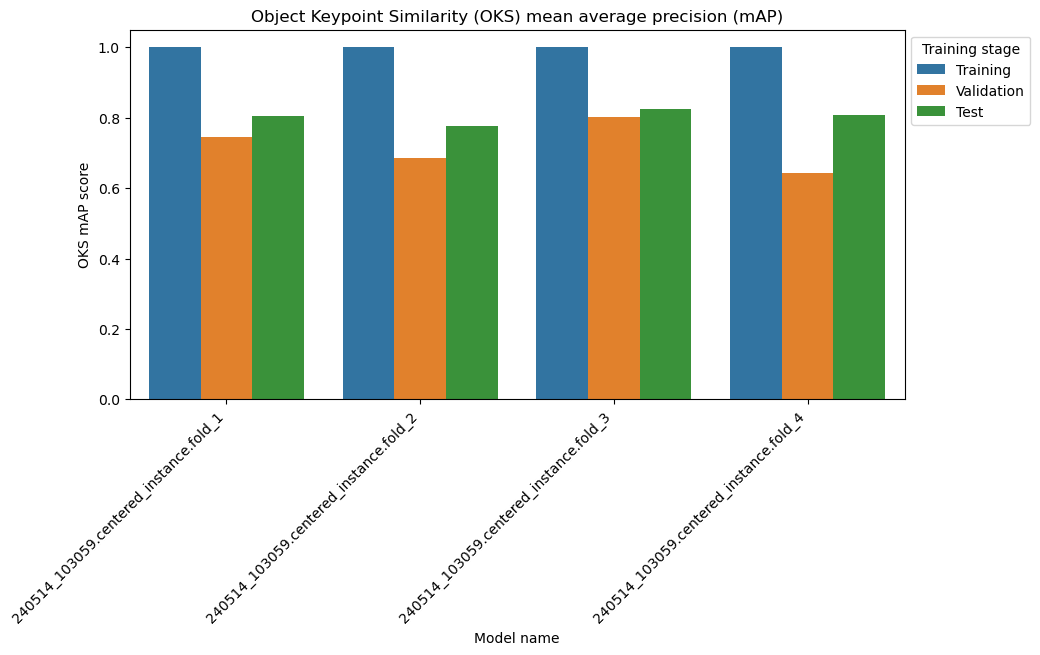

In [7]:
# Define the plot size
fig, ax = plt.subplots()
fig.set_figwidth(10)

# Populate the plot with the model data
sns.barplot(df_all_stats.loc[df_all_stats['model'].str.contains('centered_instance')], x='model', y='oks_voc.mAP', hue='metric_type', ax=ax, hue_order=['Training', 'Validation', 'Test'])

# Set the legend name and reposition
ax.legend(title='Training stage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Format the axes and set the axis names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Model name")
ax.set_ylabel("OKS mAP score")

# Add the plot title and display the plot
ax.set_title("Object Keypoint Similarity (OKS) mean average precision (mAP)")
plt.show()

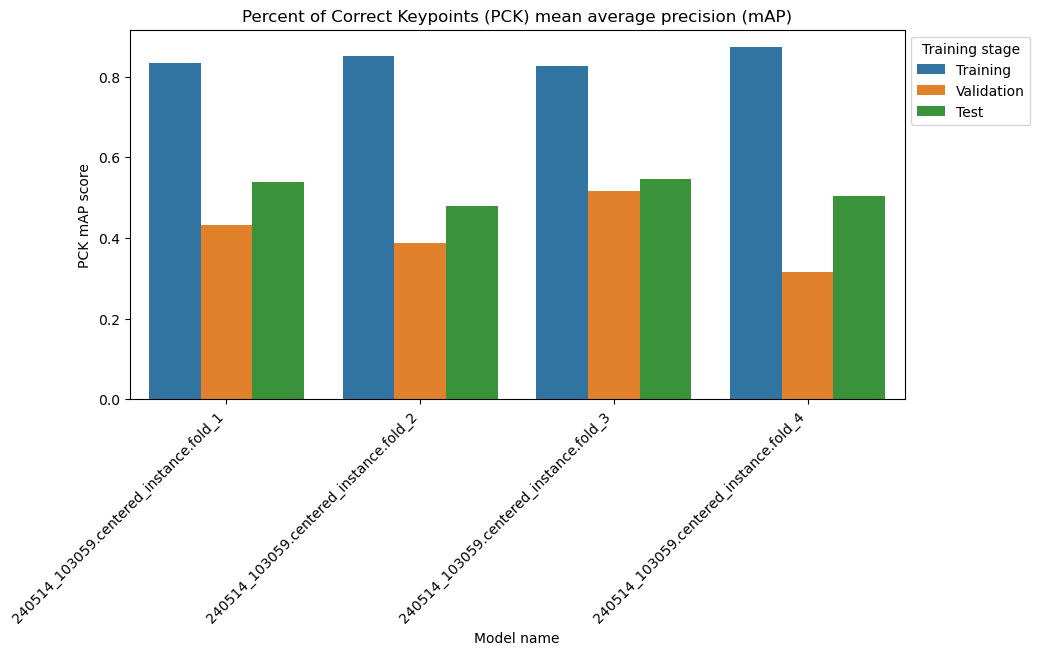

In [10]:
# Define the plot size
fig, ax = plt.subplots()
fig.set_figwidth(10)

# Populate the plot with the model data
sns.barplot(df_all_stats.loc[df_all_stats['model'].str.contains('centered_instance')], x='model', y='pck_voc.mAP', hue='metric_type', ax=ax, hue_order=['Training', 'Validation', 'Test'])

# Set the legend name and reposition
ax.legend(title='Training stage')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Format the axes and set the axis names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Model name")
ax.set_ylabel("PCK mAP score")

# Add the plot title and display the plot
ax.set_title("Percent of Correct Keypoints (PCK) mean average precision (mAP)")
plt.show()

### Part visibility accuracy

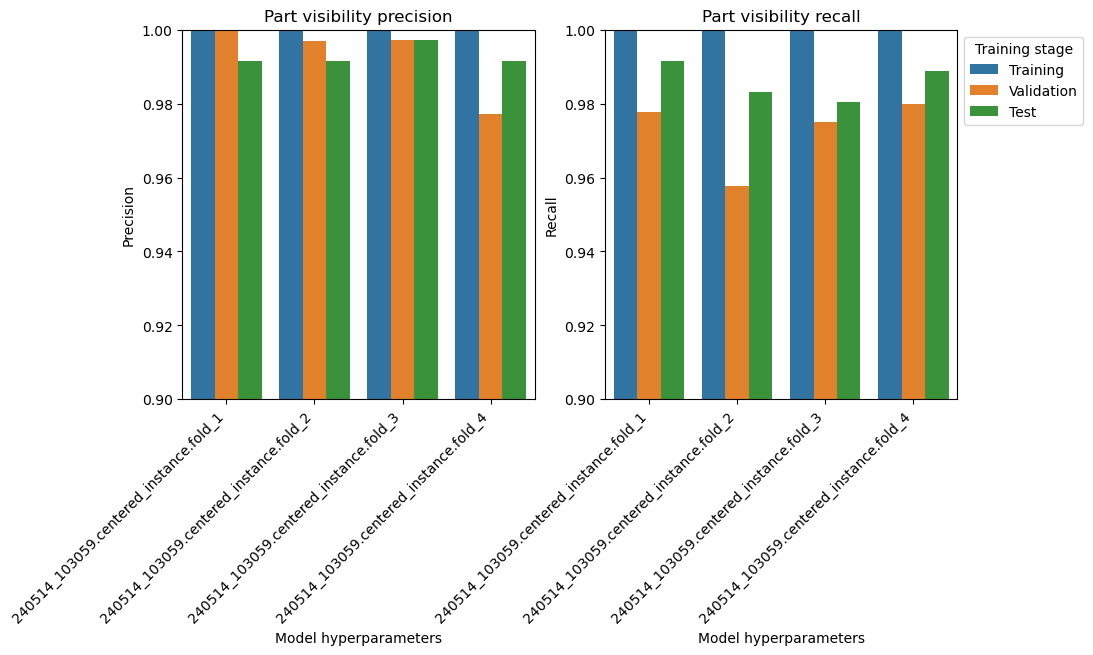

In [12]:
# Define the plot size
fig, ax = plt.subplots(1,2)
fig.set_figwidth(10)

# Populate the plot with the model data
sns.barplot(df_all_stats.loc[df_all_stats['model'].str.contains('centered_instance')], x='model', y='vis.precision', hue='metric_type', ax=ax[0], hue_order=['Training', 'Validation', 'Test'])
sns.barplot(df_all_stats.loc[df_all_stats['model'].str.contains('centered_instance')], x='model', y='vis.recall', hue='metric_type', ax=ax[1], hue_order=['Training', 'Validation', 'Test'])

# Rotate the X-axis labels to ensure they don't overlap
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# Set the legend name and reposition
ax[0].legend([],[], frameon=False)
ax[1].legend(title='Training stage')
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1, 1))

# Set the limits of the Y-axis
# NOTE: This will cut off values that fall outside the range,
# therefore this value may need to be adjusted if this occurs
ax[0].set(ylim=(0.90, 1.0))
ax[1].set(ylim=(0.90, 1.0))

# Set the axis labels and display plots
ax[0].set_xlabel("Model hyperparameters")
ax[0].set_ylabel("Precision")
ax[1].set_xlabel("Model hyperparameters")
ax[1].set_ylabel("Recall")
ax[0].set_title('Part visibility precision')
ax[1].set_title('Part visibility recall')
plt.show()